In [50]:
import pandas as pd
import numpy as np
import string
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.neighbors import KNeighborsClassifier


In [51]:
data = pd.read_table('SMSSpamCollection', delimiter='\t', names = ['Classification', 'Text'])
data

,Classification,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [52]:
data.describe()

,Classification,Text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [53]:
agrouped_data = data.groupby('Classification').size()
agrouped_data = agrouped_data.reset_index()
agrouped_data.columns = ['Classification', 'Size']
total = agrouped_data['Size'].sum()
agrouped_data['Proporção'] = agrouped_data.apply(lambda row: row['Size'] / total, axis=1)
agrouped_data

,Classification,Size,Proporção
0,ham,4825,0.865937
1,spam,747,0.134063


<BarContainer object of 2 artists>

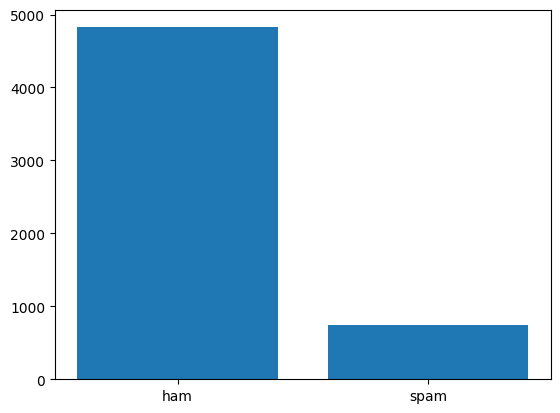

In [54]:
plt.bar(agrouped_data['Classification'], agrouped_data['Size'])

In [55]:
texts = data
texts['Number_Of_Words'] = texts['Text'].apply(lambda row: len(row.split()))
texts

,Classification,Text,Number_Of_Words
0,ham,"Go until jurong point, crazy.. Available only ...",20
1,ham,Ok lar... Joking wif u oni...,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,ham,U dun say so early hor... U c already then say...,11
4,ham,"Nah I don't think he goes to usf, he lives aro...",13
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,30
5568,ham,Will ü b going to esplanade fr home?,8
5569,ham,"Pity, * was in mood for that. So...any other s...",10
5570,ham,The guy did some bitching but I acted like i'd...,26


In [56]:
from wordcloud import WordCloud
from nltk.tokenize import RegexpTokenizer
all_text = ' '
all_text = ' '.join(texts['Text'].apply(lambda row: row.lower()))
tokenizer = RegexpTokenizer(r'\w+')
clean_tokens = tokenizer.tokenize(all_text)
clean_text = ' '.join(clean_tokens)
clean_text
print(clean_text)

go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat ok lar joking wif u oni free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry question std txt rate t c s apply 08452810075over18 s u dun say so early hor u c already then say nah i don t think he goes to usf he lives around here though freemsg hey there darling it s been 3 week s now and no word back i d like some fun you up for it still tb ok xxx std chgs to send 1 50 to rcv even my brother is not like to speak with me they treat me like aids patent as per your request melle melle oru minnaminunginte nurungu vettam has been set as your callertune for all callers press 9 to copy your friends callertune winner as a valued network customer you have been selected to receivea 900 prize reward to claim call 09061701461 claim code kl341 valid 12 hours only had your mobile 11 months or more u r entitled to update to the latest colour mobiles wi

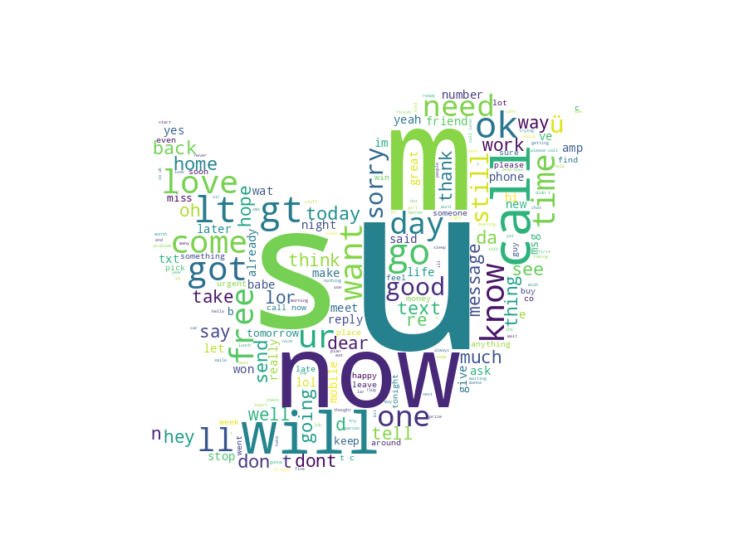

In [57]:
from PIL import Image

gmail_mask = np.array(Image.open('761_twitter.jpg'))
wordcloud = WordCloud(background_color = 'white', mask = gmail_mask).generate(clean_text)
plt.figure(figsize=(12, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [58]:
# If the use of stop_words report an error, execute the commands below 
#
# import nltk
# nltk.download('stopwords')

s = set(stopwords.words('english'))
important_words = []
for i in clean_tokens:
    if i not in s and len(i) > 1:
        important_words.append(i)
print(important_words)

['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'great', 'world', 'la', 'buffet', 'cine', 'got', 'amore', 'wat', 'ok', 'lar', 'joking', 'wif', 'oni', 'free', 'entry', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', '21st', 'may', '2005', 'text', 'fa', '87121', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 'apply', '08452810075over18', 'dun', 'say', 'early', 'hor', 'already', 'say', 'nah', 'think', 'goes', 'usf', 'lives', 'around', 'though', 'freemsg', 'hey', 'darling', 'week', 'word', 'back', 'like', 'fun', 'still', 'tb', 'ok', 'xxx', 'std', 'chgs', 'send', '50', 'rcv', 'even', 'brother', 'like', 'speak', 'treat', 'like', 'aids', 'patent', 'per', 'request', 'melle', 'melle', 'oru', 'minnaminunginte', 'nurungu', 'vettam', 'set', 'callertune', 'callers', 'press', 'copy', 'friends', 'callertune', 'winner', 'valued', 'network', 'customer', 'selected', 'receivea', '900', 'prize', 'reward', 'claim', 'call', '09061701461', 'claim', 'code', 'kl341', 'valid', '12', 'hours'

In [59]:
words = pd.DataFrame(important_words)
frequency = words.value_counts().reset_index()
frequency.columns = ['Word', 'Frequency']
frequency

,Word,Frequency
0,call,593
1,get,391
2,ur,391
3,gt,318
4,lt,316
...,...,...
8572,havbeen,1
8573,hava,1
8574,hav2hear,1
8575,haunt,1


<BarContainer object of 100 artists>

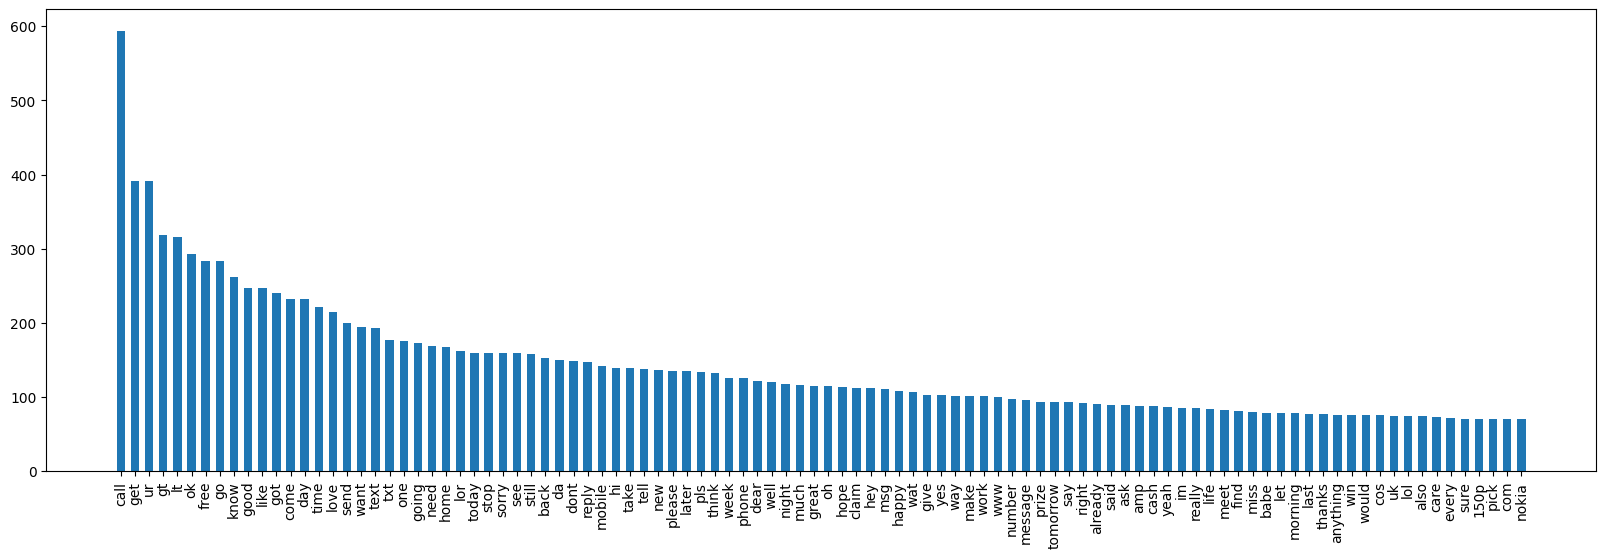

In [60]:
plt.figure(figsize=(20, 6))
plt.xticks(rotation = 90)
plt.bar(frequency['Word'][:100], frequency['Frequency'][:100], width=0.6)

In [61]:
# Stemming
stemmer = PorterStemmer()
stemmed_tokens = [stemmer.stem(word) for word in important_words]
#stemmed_tokens = [stemmer.stem(word) if word[-1] != 'y' else word for word in important_words]
print(stemmed_tokens)

# Stemming is faster, but may produce stems that are not words.
# Used, mainly, for information retrieval

['go', 'jurong', 'point', 'crazi', 'avail', 'bugi', 'great', 'world', 'la', 'buffet', 'cine', 'got', 'amor', 'wat', 'ok', 'lar', 'joke', 'wif', 'oni', 'free', 'entri', 'wkli', 'comp', 'win', 'fa', 'cup', 'final', 'tkt', '21st', 'may', '2005', 'text', 'fa', '87121', 'receiv', 'entri', 'question', 'std', 'txt', 'rate', 'appli', '08452810075over18', 'dun', 'say', 'earli', 'hor', 'alreadi', 'say', 'nah', 'think', 'goe', 'usf', 'live', 'around', 'though', 'freemsg', 'hey', 'darl', 'week', 'word', 'back', 'like', 'fun', 'still', 'tb', 'ok', 'xxx', 'std', 'chg', 'send', '50', 'rcv', 'even', 'brother', 'like', 'speak', 'treat', 'like', 'aid', 'patent', 'per', 'request', 'mell', 'mell', 'oru', 'minnaminungint', 'nurungu', 'vettam', 'set', 'callertun', 'caller', 'press', 'copi', 'friend', 'callertun', 'winner', 'valu', 'network', 'custom', 'select', 'receivea', '900', 'prize', 'reward', 'claim', 'call', '09061701461', 'claim', 'code', 'kl341', 'valid', '12', 'hour', 'mobil', '11', 'month', 'enti

In [62]:
# # If the use of lemmatizer report an error, execute the commands below 
#
# import nltk
# nltk.download('wordnet')

# Lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(word) for word in important_words]
print(lemmatized_tokens)

# Lemmatization is slower, but may produce lemmas that are valid words.
# Lemmatization uses a more linguistically informed approach, 
# involving a dictionary or a morphological analysis of words.
# Used, mainly, for information sentiment analysis and machine translation.

['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'great', 'world', 'la', 'buffet', 'cine', 'got', 'amore', 'wat', 'ok', 'lar', 'joking', 'wif', 'oni', 'free', 'entry', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', '21st', 'may', '2005', 'text', 'fa', '87121', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 'apply', '08452810075over18', 'dun', 'say', 'early', 'hor', 'already', 'say', 'nah', 'think', 'go', 'usf', 'life', 'around', 'though', 'freemsg', 'hey', 'darling', 'week', 'word', 'back', 'like', 'fun', 'still', 'tb', 'ok', 'xxx', 'std', 'chgs', 'send', '50', 'rcv', 'even', 'brother', 'like', 'speak', 'treat', 'like', 'aid', 'patent', 'per', 'request', 'melle', 'melle', 'oru', 'minnaminunginte', 'nurungu', 'vettam', 'set', 'callertune', 'caller', 'press', 'copy', 'friend', 'callertune', 'winner', 'valued', 'network', 'customer', 'selected', 'receivea', '900', 'prize', 'reward', 'claim', 'call', '09061701461', 'claim', 'code', 'kl341', 'valid', '12', 'hour', 'mobi

In [63]:
cleaned = texts['Text'].apply(lambda row: row.split())
new_cleaned = []

s = set(stopwords.words('english'))
for i in range(len(cleaned)):
    prototype = []
    all_text = ' '
    all_text = ' '.join(cleaned[i])
    tokenizer = RegexpTokenizer(r'\w+')
    clean_line = tokenizer.tokenize(all_text)
    for j in clean_line:
        if j not in s:
            prototype.append(lemmatizer.lemmatize(j.lower()))
    row = ' '.join(prototype)
    new_cleaned.append(row)
print(new_cleaned)
#clean and lemmatize for each row in dataframe, after, use this in the CountVectorizer and tf-idf

['go jurong point crazy available bugis n great world la e buffet cine got amore wat', 'ok lar joking wif u oni', 'free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry question std txt rate t c apply 08452810075over18', 'u dun say early hor u c already say', 'nah i think go usf life around though', 'freemsg hey darling 3 week word back i like fun still tb ok xxx std chgs send 1 50 rcv', 'even brother like speak they treat like aid patent', 'a per request melle melle oru minnaminunginte nurungu vettam set callertune caller press 9 copy friend callertune', 'winner a valued network customer selected receivea 900 prize reward to claim call 09061701461 claim code kl341 valid 12 hour', 'had mobile 11 month u r entitled update latest colour mobile camera free call the mobile update co free 08002986030', 'i gonna home soon want talk stuff anymore tonight k i cried enough today', 'six chance win cash from 100 20 000 pound txt csh11 send 87575 cost 150p day 6day

In [64]:
teste = np.array(new_cleaned)
dfTeste = pd.DataFrame(teste)
dfTeste.columns = ['Text']
matrix = dfTeste['Text'].apply([lambda row: row.split()])
dfTeste


,Text
0,go jurong point crazy available bugis n great ...
1,ok lar joking wif u oni
2,free entry 2 wkly comp win fa cup final tkts 2...
3,u dun say early hor u c already say
4,nah i think go usf life around though
...,...
5567,this 2nd time tried 2 contact u u 750 pound pr...
5568,will ü b going esplanade fr home
5569,pity mood so suggestion
5570,the guy bitching i acted like interested buyin...


In [65]:
def transform_message(message):
    message_not_punc = [] # Message without punctuation
    i = 0
    for punctuation in message:
        if punctuation not in string.punctuation:
            message_not_punc.append(punctuation)
    # Join words again to form the string.
    message_not_punc = ''.join(message_not_punc) 

    # Remove any stopwords for message_not_punc, but first we should     
    # to transform this into the list.
    message_clean = list(message_not_punc.split(" "))
    while i <= len(message_clean):
        for mess in message_clean:
            if mess.lower()  in stopwords.words('english'):
                message_clean.remove(mess)
        i =i +1
    return  message_clean

In [ ]:
texts['Class'] = 0
for i in range(len(texts)):
    if texts['Classification'][i] == 'ham':
        texts['Class'][i] = 0
    else:
        texts['Class'][i] = 1
texts

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from tqdm import tqdm

vectorization = CountVectorizer(analyzer=transform_message)
X = vectorization.fit(dfTeste['Text'])
X_transform = X.transform(dfTeste['Text'])
tfidf_transformer = TfidfTransformer().fit(X_transform)
X_tfidf = tfidf_transformer.transform(X_transform)

print(X_tfidf.shape)

(5572, 8074)


In [68]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, texts['Classification'], test_size=0.30, stratify=texts['Classification'])

## K-FOLD

In [98]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
fold_index = list(kf.split(dfTeste['Text']))
print(fold_index[0][0])

(array([ 558,  559,  560, ..., 5569, 5570, 5571]), array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 1

# SVM Training

In [70]:
from sklearn.svm import SVC

svc_param_grid = {
                  'C': [0.1, 1, 10],
                  'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                  'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
                }

grid = GridSearchCV(SVC(), svc_param_grid)

In [71]:
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_estimator_)
params = grid.best_params_

KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import classification_report
grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1448
        spam       0.98      0.85      0.91       224

    accuracy                           0.98      1672
   macro avg       0.98      0.92      0.95      1672
weighted avg       0.98      0.98      0.98      1672



### K-Fold

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=10)
model = SVC(C=params.get('C'), gamma=params.get('gamma'), kernel=params.get('kernel'))
cv_results_svm = cross_val_score(model, X_tfidf, texts['Classification'], cv=kf, scoring='f1_macro')
print(cv_results_svm.mean())

NameError: name 'SVC' is not defined

In [ ]:
kf

NameError: name 'kf' is not defined

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
model_GaussianNB = GaussianNB().fit(X_train.toarray(), y_train)
predictions_GaussianNB = model_GaussianNB.predict(X_test.toarray())
print('predicted', predictions_GaussianNB)

predicted ['ham' 'ham' 'spam' ... 'ham' 'ham' 'spam']


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions_GaussianNB))

              precision    recall  f1-score   support

         ham       0.98      0.89      0.93      1448
        spam       0.55      0.86      0.67       224

    accuracy                           0.89      1672
   macro avg       0.76      0.88      0.80      1672
weighted avg       0.92      0.89      0.90      1672



### K-Fold

In [ ]:
kf = KFold(n_splits=10)
model = GaussianNB()
cv_results_NB = cross_val_score(model, X_tfidf.toarray(), texts['Classification'], cv=kf, scoring='f1_macro')
print(cv_results_NB.mean())

0.8030471497877401


# KNN Training

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_param_grid = {
                  'n_neighbors': [1, 3, 5, 10, 12, 13, 14, 15, 20],
                  'algorithm': ['auto', 'brute']
                }

grid_knn = GridSearchCV(KNeighborsClassifier(), knn_param_grid)

In [ ]:
from sklearn.metrics import classification_report
grid_knn.fit(X_train, y_train)
grid_knn_predictions = grid_knn.predict(X_test)
print(classification_report(y_test, grid_knn_predictions))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.97      1448
        spam       0.99      0.67      0.79       224

    accuracy                           0.95      1672
   macro avg       0.97      0.83      0.88      1672
weighted avg       0.96      0.95      0.95      1672



In [ ]:
print(grid_knn.best_estimator_)
print(grid_knn.best_params_)

KNeighborsClassifier()
{'algorithm': 'auto', 'n_neighbors': 5}


### K-Fold

In [ ]:
kf = KFold(n_splits=10)
model = KNeighborsClassifier()
cv_results_knn = cross_val_score(model, X_tfidf, texts['Classification'], cv=kf, scoring='f1_macro')
print(cv_results_knn.mean())

0.7187683885888626


### T-Test

In [ ]:
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests

t_stat, p_value = ttest_ind(cv_results_svm, cv_results_NB)

reject, p_adjusted, _, _ = multipletests([p_value], method='bonferroni', alpha=0.05)

if reject:
    if t_stat > 0:
        print(f"Há diferença de desempenho entre os algoritmos. A média do SVM é maior do que do Naive Bayes. p-value: {p_value}, t-statistic: {t_stat}")
    else:
        print(f"Há diferença de desempenho entre os algoritmos. A média do Naive Bayes é maior do que do SVM. p-value: {p_value}, t-statistic: {t_stat}")
else:
    print(f"O desempenho dos algoritmos é parecido. p = {p_adjusted}")

Há diferença de desempenho entre os algoritmos. A média do SVM é maior do que do Naive Bayes. p-value: 5.724150538556934e-14, t-statistic: 20.61134537098432


In [ ]:
t_stat_2, p_value_2 = ttest_ind(cv_results_svm, cv_results_knn)

reject2, p_adjusted_2, _, _ = multipletests([p_value_2], method='bonferroni', alpha=0.05)
if reject2:
    if t_stat_2 > 0:
        print(f"Há diferença de desempenho entre os algoritmos. A média do SVM é maior do que do KNN. p-value: {p_value_2}, t-statistic: {t_stat_2}")
    else:
        print(f"Há diferença de desempenho entre os algoritmos. A média do KNN é maior do que do SVM. p-value: {p_value_2}, t-statistic: {t_stat_2}")
else:
    print(f"O desempenho dos algoritmos é parecido. p = {p_adjusted}")

Há diferença de desempenho entre os algoritmos. A média do SVM é maior do que do KNN. p-value: 1.9738065184902825e-16, t-statistic: 28.506785258712103


In [ ]:
t_stat_3, p_value_3 = ttest_ind(cv_results_NB, cv_results_knn)

reject3, p_adjusted_3, _, _ = multipletests([p_value_3], method='bonferroni', alpha=0.05)
if reject3:
    if t_stat_3 > 0:
        print(f"Há diferença de desempenho entre os algoritmos. A média do Naive Bayes é maior do que do KNN. p-value: {p_value_3}, t-statistic: {t_stat_3}")
    else:
        print(f"Há diferença de desempenho entre os algoritmos. A média do KNN é maior do que do Naive Bayes. p-value: {p_value_3}, t-statistic: {t_stat_3}")
else:
    print(f"O desempenho dos algoritmos é parecido. p = {p_adjusted}")

Há diferença de desempenho entre os algoritmos. A média do Naive Bayes é maior do que do KNN. p-value: 1.056118062916277e-07, t-statistic: 8.48126459244922


### Wilcoxon Test


In [ ]:
from scipy.stats import wilcoxon

t_statistic_1, p_value_1 = wilcoxon(cv_results_svm, cv_results_NB)

if p_value_1:
    if t_statistic_1 > 0:
        print(f"Há diferença de desempenho entre os algoritmos. A média do SVM é maior do que do Naive Bayes. p-value: {p_value_1}, t-statistic: {t_statistic_1}")
    else:
        print(f"Há diferença de desempenho entre os algoritmos. A média do Naive Bayes é maior do que do SVM. p-value: {p_value_1}, t-statistic: {t_statistic_1}")
else:
    print(f"O desempenho dos algoritmos é parecido. p = {p_value_1}")

Há diferença de desempenho entre os algoritmos. A média do Naive Bayes é maior do que do SVM. p-value: 0.001953125, t-statistic: 0.0


In [ ]:
t_statistic_2, p_value_2 = wilcoxon(cv_results_svm, cv_results_knn)

if p_value_2:
    if t_statistic_2 > 0:
        print(f"Há diferença de desempenho entre os algoritmos. A média do SVM é maior do que do KNN. p-value: {p_value_2}, t-statistic: {t_statistic_2}")
    else:
        print(f"Há diferença de desempenho entre os algoritmos. A média do KNN é maior do que do SVM. p-value: {p_value_2}, t-statistic: {t_statistic_2}")
else:
    print(f"O desempenho dos algoritmos é parecido. p = {p_value_2}")

Há diferença de desempenho entre os algoritmos. A média do KNN é maior do que do SVM. p-value: 0.001953125, t-statistic: 0.0


In [ ]:
t_statistic_3, p_value_3 = wilcoxon(cv_results_NB, cv_results_knn)

if p_value_3:
    if t_statistic_3 > 0:
        print(f"Há diferença de desempenho entre os algoritmos. A média do Naive Bayes é maior do que do KNN. p-value: {p_value_3}, t-statistic: {t_statistic_3}")
    else:
        print(f"Há diferença de desempenho entre os algoritmos. A média do KNN é maior do que do Naive Bayes. p-value: {p_value_3}, t-statistic: {t_statistic_3}")
else:
    print(f"O desempenho dos algoritmos é parecido. p = {p_value_3}")

Há diferença de desempenho entre os algoritmos. A média do KNN é maior do que do Naive Bayes. p-value: 0.001953125, t-statistic: 0.0
